In [3]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t
import moyra as ma
me.mechanics_printing()

In [17]:
!pip install numpy -U

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\qe19391\\AppData\\Local\\Continuum\\anaconda3\\envs\\test_moyra_3_9\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [4]:

bending = 4
in_plane_bend = 0
torsion = 0
DoFs = bending + in_plane_bend + torsion

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)
p.DoFs  = ma.ModelSymbol(value = DoFs,string = 'DoFs')
#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point

In [5]:
# inner wing properites
p.rho_b = ma.ModelSymbol(value = 0.3,string = 'rho_b')
p.c_b = ma.ModelSymbol(value = 0.3,string = 'c_b')
p.L = ma.ModelSymbol(value = 0.3,string = 'L')
p.c = ma.ModelSymbol(value = 0.3,string = 'c')
p.x_f = ma.ModelSymbol(value = 0.3,string = 'x_f')
p.x_h = ma.ModelSymbol(value = 0.3,string = 'x_h')
p.EI = ma.ModelSymbol(value = 0.3,string = 'EI')
p.GJ = ma.ModelSymbol(value = 0.3,string = 'GJ')
p.m_e = ma.ModelSymbol(value = 0.3,string = 'm_e')

p.y_0,p.x_0 = sym.symbols('y_0,x_0')

In [6]:
## GET INNER WING ELEMENT
# get shape function
S,tau = ma.elements.FlexiElement.ShapeFunctions_OBM_IBN_TO(bending,in_plane_bend,torsion,p.q[:],p.y_0,p.x_0,0,1,type='taylor')
u = S*sym.Matrix(p.q) + sym.Matrix([p.x_0,p.y_0,0])
# get reference frame
inner_wing_frame = ma.frames.HomogenousFrame().Translate(*u)
wingtip_frame = inner_wing_frame.subs({p.x_0:0,p.y_0:p.L})
# get flexible element
link2_x__int = (p.x_0,p.x_f-p.c_b*sym.Rational(1,2),p.x_f+p.c_b*sym.Rational(1,2))
link2_y_int = (p.y_0,0,p.L)
main_wing_ele = ma.elements.FlexiElement(p.q,inner_wing_frame,p.rho_b,S,link2_x__int,link2_y_int,0,p.q[:],p.EI,p.GJ,grav_vec = p.g*p.g_v,simplify = False)

engine_mass = ma.elements.RigidElement.point_mass(p.q,wingtip_frame,p.m_e,grav_vec = p.g*p.g_v)

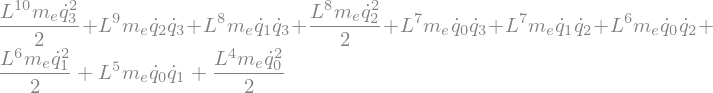

In [7]:
engine_mass.ke

In [8]:
# %%timeit -n 1 -r 1
sm = ma.SymbolicModel.FromElementsAndForces(p.q,[main_wing_ele,engine_mass])

Generating EoM for Element 1 out of 2 - default:FlexiElement
Generating EoM for Element 2 out of 2 - default:RigidElement


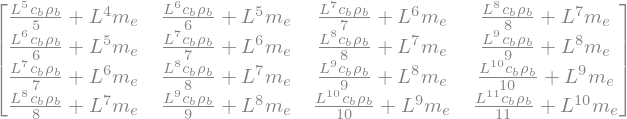

In [9]:
sm.M

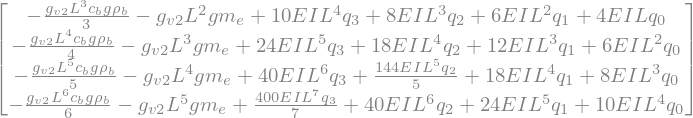

In [10]:
sm.f

In [11]:
funcs = []
funcs.append(('get_pos_inner_wing',inner_wing_frame.transform_point([0]*3)))

In [12]:
base_dir = "C:\\Git\\ForSD"
class_name = "RC_4B0T"
base_class = None
sm.to_matlab_class(p,base_dir,class_name,base_class,additional_funcs=funcs)

Unknown variable y_0 found in function get_pos_inner_wing. It will be added to the function signature.
Unknown variable x_0 found in function get_pos_inner_wing. It will be added to the function signature.
